<a href="https://colab.research.google.com/github/jaykang1991/Machine_Learning_GlobalIT/blob/main/ML_Classification__KNN_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Classification with KNN

### Input Data and plot using matplotlib

In [2]:
bream_length=[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

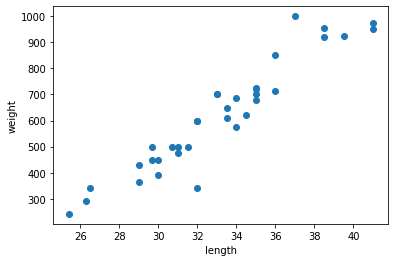

In [3]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

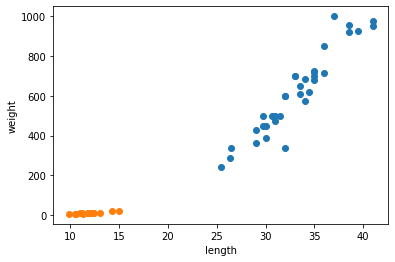

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

### zip (combine) data and create target data

In [6]:
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [7]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Use KNeighbors default for prediction

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) # Train the model with provided data
kn.score(fish_data, fish_target) # Check accuracy of the model

1.0

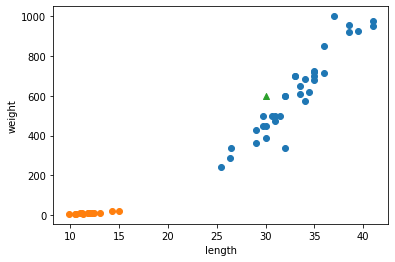

In [9]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600,marker='^') # Check the test data with marker
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
kn.predict([[30,600]])

array([1])

### Use KNN with different neighbor(hyper parameter) for prediction

In [11]:
kn20 = KNeighborsClassifier(n_neighbors=20) # Select Hyper Parameter of the Nearest Neighbor to 20
kn20.fit(fish_data, fish_target)
kn20.score(fish_data, fish_target) # Accuracy is 97%
kn20.predict([[30,600]])

array([1])

In [12]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
# To Check which neighbor number is below 100% accuracy
for n in range(5,50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n, score)
    break;

18 0.9795918367346939


### Mixing up data for classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
print(fish_data[4])

[29.0, 430.0]


In [14]:
train_input = fish_data[:35]
train_target = fish_target[0:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # Since we put different data set for train, test it's not applicable

0.0

In [15]:
# Shuffle data randomly with index
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)

np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [16]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

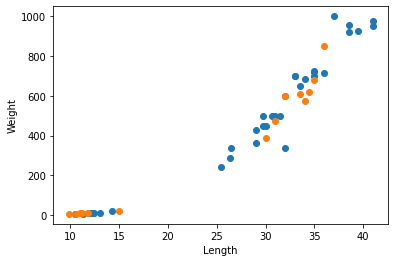

In [17]:
# To check whether it's mixed well
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [18]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [19]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [20]:
test_target # Prediction of classification is perfect 

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### Using stratify for Classification

In [21]:
fish_data = np.column_stack((length, weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [22]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [23]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [24]:
# using stratify
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [26]:
# Wrong prediction 
print(kn.predict([[25, 150]]))

[0.]


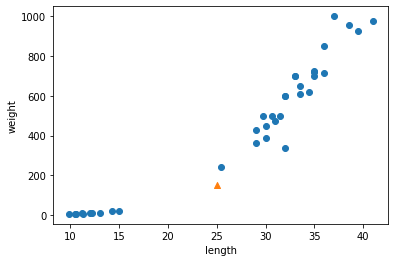

In [27]:
# To check the graph for visual
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

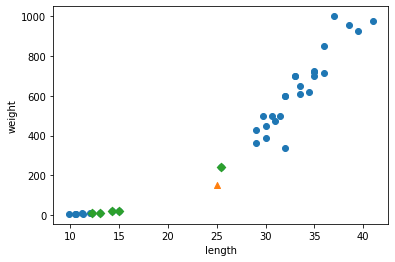

In [28]:
# To check which plot was calculated for the nearest
distance, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(distance)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


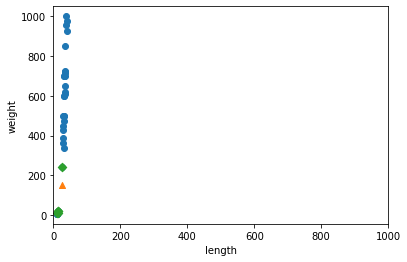

In [30]:
# To check the visual with the distance
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Standardize data for accuracy 

In [31]:
# Calculate mean, std to get the 표준 점수
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


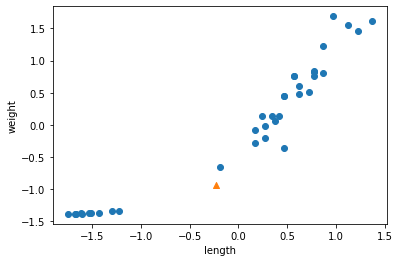

In [32]:
# Calculated standard points so the prediction would be correct
train_scaled = (train_input-mean)/std
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean)/std
kn.score(test_scaled, test_target)

1.0

In [34]:
# Correct prediction
print(kn.predict([new]))

[1.]


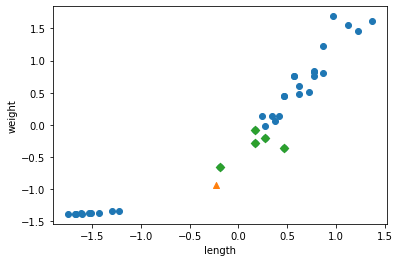

In [35]:
# To check the plot with the recalculated distance
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()